## Week 3

<img src="../../img/1_supervised_ml_regression_and_classification/supervised/classification/classification.png" width="700"/>
<br>

We often designate clauses as no or yes or sometimes equivalently false or true or very commonly using the numbers zero or one. Following the common convention in computer science with zero denoting falls and one denoting true.  usually going to use the numbers zero and one to represent the answer 'y'.

<img src="../../img/1_supervised_ml_regression_and_classification/supervised/classification/classification_with_lr.png" width="700"/>
<br>

Linear regression predicts not just the values zero and one. But all numbers between zero and one or even less than zero or greater than one. But here we want to predict categories. One thing you could try is to pick a threshold of say 0.5. So that if the model outputs a value below 0.5, then you predict why equal zero or not malignant. And if the model outputs a number equal to or greater than 0.5, then predict Y equals one or malignant.

This isn't what we want because adding that example way to the right shouldn't change any of our conclusions about how to classify malignant versus benign tumors. But if you try to do this with linear regression, adding this one example which feels like it shouldn't be changing anything. It ends up with us learning a much worse function for this classification problem. Clearly, when the tumor is large, we want the algorithm to classify it as malignant. So what we just saw was linear regression causes the best fit line. When we added one more example to the right to shift over. And does the dividing line also called the decision boundary to shift over to the right.

### Example
Examples of classification problems are things like: identifying email as Spam or Not Spam or determining if a tumor is malignant or benign. In particular, these are examples of binary classification where there are two possible outcomes. Outcomes can be described in pairs of 'positive'/'negative' such as 'yes'/'no, 'true'/'false' or '1'/'0'.

Plots of classification data sets often use symbols to indicate the outcome of an example. In the plots below, 'X' is used to represent the positive values while 'O' represents negative outcomes.

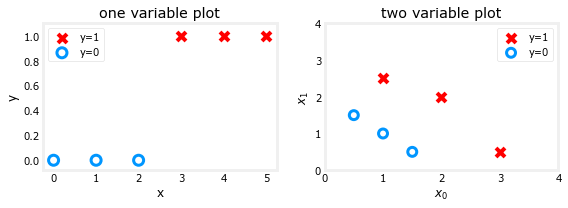

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from lab_utils_common import dlc, plot_data
from plt_one_addpt_onclick import plt_one_addpt_onclick

x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0, 0, 0, 1, 1, 1])
X_train2 = np.array([[0.5, 1.5], [1, 1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train2 = np.array([0, 0, 0, 1, 1, 1])

pos = y_train == 1
neg = y_train == 0

fig, ax = plt.subplots(1, 2, figsize=(8, 3))
#plot 1, single variable
ax[0].scatter(x_train[pos], y_train[pos], marker='x', s=80, c='red', label="y=1")
ax[0].scatter(x_train[neg], y_train[neg], marker='o', s=100, label="y=0", facecolors='none',
              edgecolors=dlc["dlblue"], lw=3)

ax[0].set_ylim(-0.08, 1.1)
ax[0].set_ylabel('y', fontsize=12)
ax[0].set_xlabel('x', fontsize=12)
ax[0].set_title('one variable plot')
ax[0].legend()

#plot 2, two variables
plot_data(X_train2, y_train2, ax[1])
ax[1].axis([0, 4, 0, 4])
ax[1].set_ylabel('$x_1$', fontsize=12)
ax[1].set_xlabel('$x_0$', fontsize=12)
ax[1].set_title('two variable plot')
ax[1].legend()
plt.tight_layout()
plt.show()

Note in the plots above:
- In the single variable plot, positive results are shown both a red 'X's and as y=1. Negative results are blue 'O's and are located at y=0.
   - Recall in the case of linear regression, y would not have been limited to two values but could have been any value.
- In the two-variable plot, the y axis is not available.  Positive results are shown as red 'X's, while negative results use the blue 'O' symbol.
    - Recall in the case of linear regression with multiple variables, y would not have been limited to two values and a similar plot would have been three-dimensional.

## Linear Regression approach
In the previous week, you applied linear regression to build a prediction model. Let's try that approach here using the simple example that was described in the lecture. The model will predict if a tumor is benign or malignant based on tumor size.  Try the following:
- Click on 'Run Linear Regression' to find the best linear regression model for the given data.
    - Note the resulting linear model does **not** match the data well.
One option to improve the results is to apply a *threshold*.
- Tick the box on the 'Toggle 0.5 threshold' to show the predictions if a threshold is applied.
    - These predictions look good, the predictions match the data
- *Important*: Now, add further 'malignant' data points on the far right, in the large tumor size range (near 10), and re-run linear regression.
    - Now, the model predicts the larger tumor, but data point at x=3 is being incorrectly predicted!
- to clear/renew the plot, rerun the cell containing the plot command.

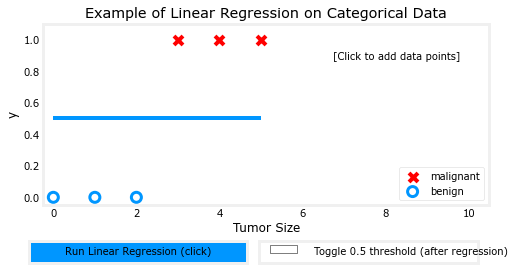

In [2]:
w_in = np.zeros((1))
b_in = 0
plt.close('all')
addpt = plt_one_addpt_onclick(x_train, y_train, w_in, b_in, logistic=False)

### Logistic regression
Logistic regression is probably the single most widely used classification algorithm in the world.
For this example, if a patient comes in with a tumor of this size, which I'm showing on the x-axis, then the algorithm will output 0.7 suggesting that is closer or maybe more likely to be malignant and benign. Will say more later what 0.7 actually means in this context. But the output label y is never 0.7 is only ever 0 or 1. To build out to the logistic regression algorithm, there's an important mathematical function I like to describe which is called the **Sigmoid function**, sometimes also called  as the **logistic function.**


That's why the sigmoid function has this shape where it starts very close to zero and slowly builds up or grows to the value of one. Also, in the Sigmoid function when z is equal to 0, then e to the negative z is e to the negative 0 which is equal to 1, and so g of z is equal to 1 over 1 plus 1 which is 0.5, so that's why it passes the vertical axis at 0.5.

<img src="../../img/1_supervised_ml_regression_and_classification/supervised/log_reg/sigmoid_function_explained.png" width="700"/>
<br>

Also, in the Sigmoid function when z is equal to 0, then e to the negative z is e to the negative 0 which is equal to 1, and so g of z is equal to 1 over 1 plus 1 which is 0.5, so that's why it passes the vertical axis at 0.5


##### The logistic regression is linear regression + sigmoid function
<img src="../../img/1_supervised_ml_regression_and_classification/supervised/log_reg/log_reg_formula.png" width="700"/>
<br>
<img src="../../img/1_supervised_ml_regression_and_classification/supervised/log_reg/log_reg_question1.png" width="700"/>

#### Sigmoid or Logistic Function
<img align="left" src="../../img/1_supervised_ml_regression_and_classification/supervised/log_reg/sigmoid_or_logistic_function.png" width="400"    style=" width:300px; padding: 10px;"/>

As discussed in the lecture videos, for a classification task, we can start by using our linear regression model, $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot  \mathbf{x}^{(i)} + b$, to predict $y$ given $x$.
- However, we would like the predictions of our classification model to be between 0 and 1 since our output variable $y$ is either 0 or 1.
- This can be accomplished by using a "sigmoid function" which maps all input values to values between 0 and 1.


Let's implement the sigmoid function and see this for ourselves.

#### Formula for Sigmoid function

The formula for a sigmoid function is as follows -

$g(z) = \frac{1}{1+e^{-z}}\tag{1}$

In the case of logistic regression, z (the input to the sigmoid function), is the output of a linear regression model.
- In the case of a single example, $z$ is scalar.
- in the case of multiple examples, $z$ may be a vector consisting of $m$ values, one for each example.
- The implementation of the sigmoid function should cover both of these potential input formats.

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
from plt_one_addpt_onclick import plt_one_addpt_onclick
from lab_utils_common import draw_vthresh

plt.style.use('./deeplearning.mplstyle')

# Input is an array.
input_array = np.array([1, 2, 3])
exp_array = np.exp(input_array)

print("Input to exp:", input_array)
print("Output of exp:", exp_array)

# Input is a single number
input_val = 1
exp_val = np.exp(input_val)

print("Input to exp:", input_val)
print("Output of exp:", exp_val)


def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z

    """
    res = []
    for i in z:
        res.append(1 / (1 + math.e ** -i))

    g = 1 / (1 + np.exp(-z))

    return res


# Let's see what the output of this function is for various value of z
# Generate an array of evenly spaced values between -10 and 10
z_tmp = np.arange(-5, 5)

# Use the function implemented above to get the sigmoid values
y = sigmoid(z_tmp)

# Code for pretty printing the two arrays next to each other
np.set_printoptions(precision=3)
print("Input (z):")
print(z_tmp)

print("Output sigmoid(z):")
print(y)

Input to exp: [1 2 3]
Output of exp: [ 2.72  7.39 20.09]
Input to exp: 1
Output of exp: 2.718281828459045
Input (z):
[-5 -4 -3 -2 -1  0  1  2  3  4]
Output sigmoid(z):
[0.006692850924284857, 0.017986209962091562, 0.04742587317756679, 0.11920292202211757, 0.2689414213699951, 0.5, 0.7310585786300049, 0.8807970779778823, 0.9525741268224331, 0.9820137900379085]


The values in the left column are `z`, and the values in the right column are `sigmoid(z)`. As you can see, the input values to the sigmoid range from -10 to 10, and the output values range from 0 to 1.

Now, let's try to plot this function using the `matplotlib` library.

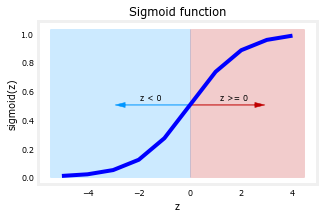

In [4]:
# Plot z vs sigmoid(z)
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.plot(z_tmp, y, c="b")

ax.set_title("Sigmoid function")
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')
draw_vthresh(ax, 0)

Let's apply logistic regression to the categorical data example of tumor classification.
First, load the examples and initial values for the parameters.

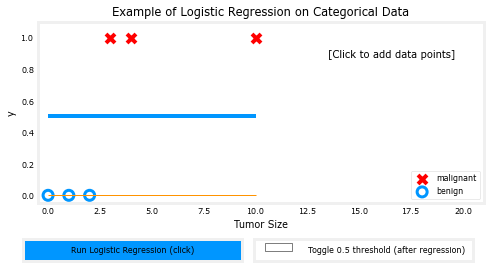

In [5]:
x_train = np.array([0., 1, 2, 3, 4, 10])
y_train = np.array([0, 0, 0, 1, 1, 1])

w_in = np.zeros((1))
b_in = 0

plt.close('all')
addpt = plt_one_addpt_onclick(x_train, y_train, w_in, b_in, logistic=True)

Try the following steps:
- Click on 'Run Logistic Regression' to find the best logistic regression model for the given training data
    - Note the resulting model fits the data quite well.
    - Note, the orange line is '$z$' or $\mathbf{w} \cdot \mathbf{x}^{(i)} + b$  above. It does not match the line in a linear regression model.
Further improve these results by applying a *threshold*.
- Tick the box on the 'Toggle 0.5 threshold' to show the predictions if a threshold is applied.
    - These predictions look good. The predictions match the data
    - Now, add further data points in the large tumor size range (near 10), and re-run logistic regression.
    - unlike the linear regression model, this model continues to make correct predictions

<img src="../../img/1_supervised_ml_regression_and_classification/supervised/log_reg/log_reg_example_result.png" width="700"/>

### Decision boundary
Let's take a look at the decision boundary to get a better sense of how logistic regression is computing these predictions.

<img src="../../img/1_supervised_ml_regression_and_classification/supervised/log_reg/decision_boundary.png" width="700"/>


Now, for the values of the parameters w_1, w_2, and b that we had written down above, this decision boundary is just x_1 plus x_2 minus 3. When is x_1 plus x_2 minus 3 equal to 0? Well, that will correspond to the **line x_1 plus x_2 equals 3**, and that is this line shown over here.

<img src="../../img/1_supervised_ml_regression_and_classification/supervised/log_reg/decision_boundary_line.png" width="700"/>

This line turns out to be the decision boundary, where if the features x are to the right of this line, logistic regression would predict 1 and to the left of this line, logistic regression with predicts 0.

<img src="../../img/1_supervised_ml_regression_and_classification/supervised/log_reg/decision_boundary_non_linear.png" width="700"/>

One more example of "non-linear decision boundary"
<img src="../../img/1_supervised_ml_regression_and_classification/supervised/log_reg/decision_boundary_non_linear2.png" width="700"/>


This implementation of logistic regression will predict y equals 1 inside this shape and outside the shape will predict y equals 0.

One more example of "non-linear decision boundary"
<img src="../../img/1_supervised_ml_regression_and_classification/supervised/log_reg/decision_boundary_question.png" width="700"/>

## Example
Plot the decision boundary for a logistic regression model. This will give you a better sense of what the model is predicting.

#### Dataset

Let's suppose you have following training dataset
- The input variable `X` is a numpy array which has 6 training examples, each with two features
- The output variable `y` is also a numpy array with 6 examples, and `y` is either `0` or `1`

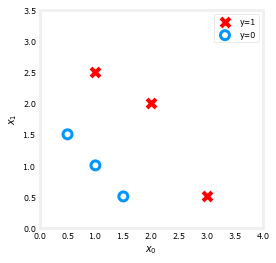

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_common import plot_data, sigmoid, draw_vthresh

plt.style.use('./deeplearning.mplstyle')

X = np.array([[0.5, 1.5], [1, 1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1]).reshape(-1, 1)

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
plot_data(X, y, ax)

ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('$x_1$')
ax.set_xlabel('$x_0$')
plt.show()

#### Logistic regression model
* Suppose you'd like to train a logistic regression model on this data which has the form

  $f(x) = g(w_0x_0+w_1x_1 + b)$

  where $g(z) = \frac{1}{1+e^{-z}}$, which is the sigmoid function

* Let's say that you trained the model and get the parameters as $b = -3, w_0 = 1, w_1 = 1$. That is,

  $f(x) = g(x_0+x_1-3)$

  (You'll learn how to fit these parameters to the data further in the course)

Let's try to understand what this trained model is predicting by plotting its decision boundary


#### Refresher on logistic regression and decision boundary

* Recall that for logistic regression, the model is represented as

  $$f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b) \tag{1}$$

  where $g(z)$ is known as the sigmoid function and it maps all input values to values between 0 and 1:

  $g(z) = \frac{1}{1+e^{-z}}\tag{2}$

  and $\mathbf{w} \cdot \mathbf{x}$ is the vector dot product:

  $$\mathbf{w} \cdot \mathbf{x} = w_0 x_0 + w_1 x_1$$


 * We interpret the output of the model ($f_{\mathbf{w},b}(x)$) as the probability that $y=1$ given $\mathbf{x}$ and parameterized by $\mathbf{w}$ and $b$.
* Therefore, to get a final prediction ($y=0$ or $y=1$) from the logistic regression model, we can use the following heuristic -

  if $f_{\mathbf{w},b}(x) >= 0.5$, predict $y=1$

  if $f_{\mathbf{w},b}(x) < 0.5$, predict $y=0$


* Let's plot the sigmoid function to see where $g(z) >= 0.5$

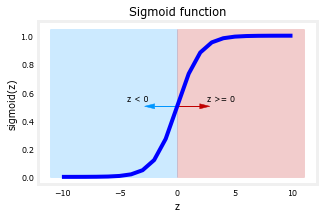

In [7]:
# Plot sigmoid(z) over a range of values from -10 to 10
z = np.arange(-10, 11)

fig, ax = plt.subplots(1, 1, figsize=(5, 3))
# Plot z vs sigmoid(z)
ax.plot(z, sigmoid(z), c="b")

ax.set_title("Sigmoid function")
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')
draw_vthresh(ax, 0)

* As you can see, $g(z) >= 0.5$ for $z >=0$

* For a logistic regression model, $z = \mathbf{w} \cdot \mathbf{x} + b$. Therefore,

  if $\mathbf{w} \cdot \mathbf{x} + b >= 0$, the model predicts $y=1$

  if $\mathbf{w} \cdot \mathbf{x} + b < 0$, the model predicts $y=0$



### Plotting decision boundary

Now, let's go back to our example to understand how the logistic regression model is making predictions.

* Our logistic regression model has the form

  $f(\mathbf{x}) = g(-3 + x_0+x_1)$


* From what you've learnt above, you can see that this model predicts $y=1$ if $-3 + x_0+x_1 >= 0$

Let's see what this looks like graphically. We'll start by plotting $-3 + x_0+x_1 = 0$, which is equivalent to $x_1 = 3 - x_0$.

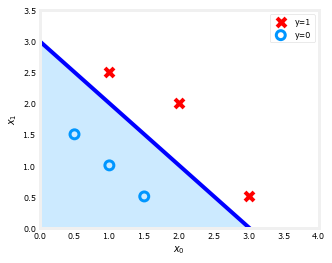

In [8]:
# Choose values between 0 and 6
x0 = np.arange(0, 6)

x1 = 3 - x0
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
# Plot the decision boundary
ax.plot(x0, x1, c="b")
ax.axis([0, 4, 0, 3.5])

# Fill the region below the line
ax.fill_between(x0, x1, alpha=0.2)

# Plot the original data
plot_data(X, y, ax)
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')
plt.show()

* In the plot above, the blue line represents the line $x_0 + x_1 - 3 = 0$ and it should intersect the x1 axis at 3 (if we set $x_1$ = 3, $x_0$ = 0) and the x0 axis at 3 (if we set $x_1$ = 0, $x_0$ = 3).


* The shaded region represents $-3 + x_0+x_1 < 0$. The region above the line is $-3 + x_0+x_1 > 0$.


* Any point in the shaded region (under the line) is classified as $y=0$.  Any point on or above the line is classified as $y=1$. This line is known as the "decision boundary".

As we've seen in the lectures, by using higher order polynomial terms (eg: $f(x) = g( x_0^2 + x_1 -1)$, we can come up with more complex non-linear boundaries.

## Quiz

<img src="../../img/1_supervised_ml_regression_and_classification/supervised/log_reg/quiz_1.png" width="900"/>
<br>
<img src="../../img/1_supervised_ml_regression_and_classification/supervised/log_reg/quiz_2.png" width="900"/>
<br>
<img src="../../img/1_supervised_ml_regression_and_classification/supervised/log_reg/quiz_3.png" width="900"/>
<br>
<img src="../../img/1_supervised_ml_regression_and_classification/supervised/log_reg/quiz_4.png" width="900"/>

## Cost function for logistic regression

The cost function gives you a way to measure how well a **specific set of parameters** fits the training data. Thereby gives you a way to try to choose **better parameters.**


<img src="../../img/1_supervised_ml_regression_and_classification/supervised/log_reg/square_err_cost_for_data.png" width="700"/>


Given this training set, how can you choose parameters w and b? Recall for linear regression, this is the squared error cost function.


<img src="../../img/1_supervised_ml_regression_and_classification/supervised/log_reg/square_err_cost_convex_not_convex.png" width="700"/>



**Convex** function or a bowl shape or hammer shape. Gradient descent will look like this, where you take one step, one step, and so on to converge at the global minimum.

**Non-convex** cost function is not convex. What this means is that if you were to try to use gradient descent. There are lots of local minima that you can get sucking.

Instead, there will be a different cost function that can make the cost function convex again. The gradient descent can be guaranteed to converge to the global minimum.
In order to build a new cost function, one that we'll use for logistic regression. I'm going to change a little bit the definition of the cost function J of w and b.

<img src="../../img/1_supervised_ml_regression_and_classification/supervised/log_reg/updated_cost_function_log_reg.png" width="700"/>

<br>
<img src="../../img/1_supervised_ml_regression_and_classification/supervised/log_reg/logistic_loss_function.png" width="700"/>


The loss function inputs f of x and the true label y and tells us how well we're doing on that example. I'm going to just write down here at the definition of the loss function we'll use for logistic regression. If the label y is equal to 1, then the loss is negative log of f of x and if the label y is equal to 0, then the loss is negative log of 1 minus f of x.

Remember, the loss function measures how well you're doing on one training example and is by summing up the losses on all of the training examples that you then get, the cost function, which measures how well you're doing on the entire training set.

 If the algorithm predicts a probability close to 1 and the true label is 1, then the loss is very small. It's pretty much 0 because you're very close to the right answer.

When y is equal to 1, the loss function incentivizes or nurtures, or helps push the algorithm to make more accurate predictions because the loss is lowest, when it predicts values close to 1. Now on this slide, we'll be looking at what the loss is when y is equal to 1. On this slide, let's look at the second part of the loss function corresponding to when y is equal to 0. In this case, the loss is negative log of 1 minus f of x. When this function is plotted, it actually looks like this. The range of f is limited to 0 to 1 because logistic regression only outputs values between 0 and 1.

<br>
<img src="../../img/1_supervised_ml_regression_and_classification/supervised/log_reg/logistic_loss_function2.png" width="700"/>


The second part of the loss function corresponding to when y is equal to 0. In this case, the loss is negative log of 1 minus f of x.
When f is 0 or very close to 0, the loss is also going to be very small which means that if the true label is 0 and the model's prediction is very close to 0, well, you nearly got it right so the loss is appropriately very close to 0. The larger the value of f of x gets, the bigger the loss because the prediction is further from the true label 0. In fact, as that prediction approaches 1, the loss actually approaches infinity. Going back to the tumor prediction example just says if the model predicts that the patient's tumor is almost certain to be malignant, say, 99.9 percent chance of malignancy, that turns out to actually not be malignant, so y equals 0 then we penalize the model with a very high loss. In this case of y equals 0, so this is in the case of y equals 1 on the previous slide, the further the prediction f of x is away from the true value of y, the higher the loss.


**You saw why the squared error cost function doesn't work well for logistic regression.**

<img src="../../img/1_supervised_ml_regression_and_classification/supervised/log_reg/question_err_cost.png" width="700"/>


Recall for **Linear** Regression we have used the **squared error cost function**:
The equation for the squared error cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$

where
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$

Recall, the squared error cost had the nice property that following the derivative of the cost leads to the minimum.

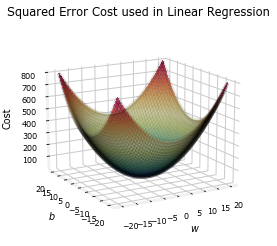

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from plt_logistic_loss import plt_logistic_cost, plt_two_logistic_loss_curves, plt_simple_example
from plt_logistic_loss import soup_bowl, plt_logistic_squared_error

plt.style.use('./deeplearning.mplstyle')

soup_bowl()

This cost function worked well for linear regression, it is natural to consider it for logistic regression as well. However, as the slide above points out, $f_{wb}(x)$ now has a non-linear component, the sigmoid function:   $f_{w,b}(x^{(i)}) = sigmoid(wx^{(i)} + b )$.   Let's try a squared error cost on the example from an earlier lab, now including the sigmoid.

Now, let's get a surface plot of the cost using a *squared error cost*:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 $$

where
  $$f_{w,b}(x^{(i)}) = sigmoid(wx^{(i)} + b )$$

Here is our training data:

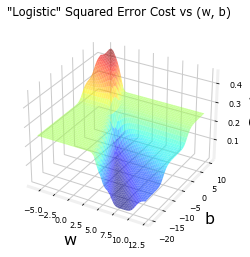

In [11]:
x_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.longdouble)
y_train = np.array([0, 0, 0, 1, 1, 1], dtype=np.longdouble)
plt_simple_example(x_train, y_train)

plt.close('all')
plt_logistic_squared_error(x_train, y_train)
plt.show()

Logistic Regression uses a loss function more suited to the task of categorization where the target is 0 or 1 rather than any number.

>**Definition Note:**   In this course, these definitions are used:
**Loss** is a measure of the difference of a single example to its target value while the
**Cost** is a measure of the losses over the training set


This is defined:
* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is:

\begin{equation}
  loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = \begin{cases}
    - \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=1$}\\
    - \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=0$}
  \end{cases}
\end{equation}


*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value.

*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot\mathbf{x}^{(i)}+b)$ where function $g$ is the sigmoid function.

The defining feature of this loss function is the fact that it uses two separate curves. One for the case when the target is zero or ($y=0$) and another for when the target is one ($y=1$). Combined, these curves provide the behavior useful for a loss function, namely, being zero when the prediction matches the target and rapidly increasing in value as the prediction differs from the target. Consider the curves below:

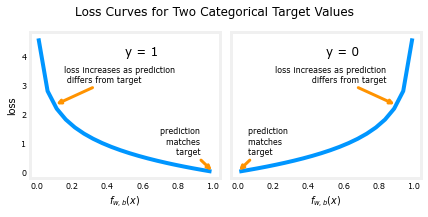

In [12]:
plt_two_logistic_loss_curves()

Combined, the curves are similar to the quadratic curve of the squared error loss. Note, the x-axis is $f_{\mathbf{w},b}$ which is the output of a sigmoid. The sigmoid output is strictly between 0 and 1.
The loss function above can be rewritten to be easier to implement.
    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)$$

This is a rather formidable-looking equation. It is less daunting when you consider $y^{(i)}$ can have only two values, 0 and 1. One can then consider the equation in two pieces:
when $ y^{(i)} = 0$, the left-hand term is eliminated:
$$
\begin{align}
loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), 0) &= (-(0) \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - 0\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \\
&= -\log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)
\end{align}
$$
and when $ y^{(i)} = 1$, the right-hand term is eliminated:
$$
\begin{align}
  loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), 1) &=  (-(1) \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - 1\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)\\
  &=  -\log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)
\end{align}
$$

OK, with this new logistic loss function, a cost function can be produced that incorporates the loss from all the examples. This will be the topic of the next lab. For now, let's take a look at the cost vs parameters curve for the simple example we considered above:

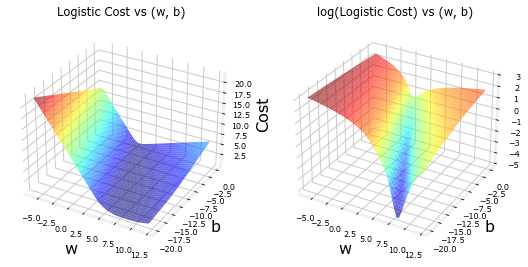

In [13]:
plt.close('all')
cst = plt_logistic_cost(x_train, y_train)

This curve is well suited to gradient descent! It does not have plateaus, local minima, or discontinuities. Note, it is not a bowl as in the case of squared error. Both the cost and the log of the cost are plotted to illuminate the fact that the curve, when the cost is small, has a slope and continues to decline. Reminder: you can rotate the above plots using your mouse.

### Simplified Cost Function for Logistic Regression
#### Goals
In this lab, you will:
- examine the implementation and utilize the cost function for logistic regression.



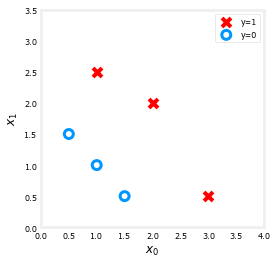

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_common import plot_data, sigmoid, dlc

plt.style.use('./deeplearning.mplstyle')

X_train = np.array([[0.5, 1.5], [1, 1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1])  #(m,)

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
plot_data(X_train, y_train, ax)

# Set both axes to be from 0-4
ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.show()

## Cost function

Here you combine the losses to form the **cost**, which includes all the examples.


Recall that for logistic regression, the cost function is of the form

$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

where
* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is:

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$

* where m is the number of training examples in the data set and:
$$
\begin{align}
  f_{\mathbf{w},b}(\mathbf{x^{(i)}}) &= g(z^{(i)})\tag{3} \\
  z^{(i)} &= \mathbf{w} \cdot \mathbf{x}^{(i)}+ b\tag{4} \\
  g(z^{(i)}) &= \frac{1}{1+e^{-z^{(i)}}}\tag{5}
\end{align}
$$
#### Code Description

The algorithm for `compute_cost_logistic` loops over all the examples calculating the loss for each example and accumulating the total.

Note that the variables X and y are not scalar values but matrices of shape ($m, n$) and ($𝑚$,) respectively, where  $𝑛$ is the number of features and $𝑚$ is the number of training examples.


In [15]:
def compute_cost_logistic(X, y, w, b):
    """
    Computes cost

    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      cost (scalar): cost
    """

    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i], w) + b
        f_wb_i = sigmoid(z_i)
        cost += -y[i] * np.log(f_wb_i) - (1 - y[i]) * np.log(1 - f_wb_i)

    cost = cost / m
    return cost


w_tmp = np.array([1, 1])
b_tmp = -3
print(compute_cost_logistic(X_train, y_train, w_tmp, b_tmp))

0.36686678640551745


Now, let's see what the cost function output is for a different value of $w$.

* In a previous lab, you plotted the decision boundary for  $b = -3, w_0 = 1, w_1 = 1$. That is, you had `b = -3, w = np.array([1,1])`.

* Let's say you want to see if $b = -4, w_0 = 1, w_1 = 1$, or `b = -4, w = np.array([1,1])` provides a better model.

Let's first plot the decision boundary for these two different $b$ values to see which one fits the data better.

* For $b = -3, w_0 = 1, w_1 = 1$, we'll plot $-3 + x_0+x_1 = 0$ (shown in blue)
* For $b = -4, w_0 = 1, w_1 = 1$, we'll plot $-4 + x_0+x_1 = 0$ (shown in magenta)

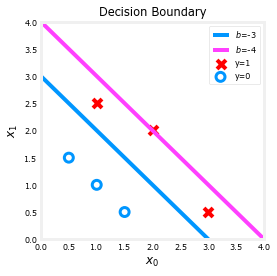

In [16]:
import matplotlib.pyplot as plt

# Choose values between 0 and 6
x0 = np.arange(0, 6)

# Plot the two decision boundaries
x1 = 3 - x0
x1_other = 4 - x0

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
# Plot the decision boundary
ax.plot(x0, x1, c=dlc["dlblue"], label="$b$=-3")
ax.plot(x0, x1_other, c=dlc["dlmagenta"], label="$b$=-4")
ax.axis([0, 4, 0, 4])

# Plot the original data
plot_data(X_train, y_train, ax)
ax.axis([0, 4, 0, 4])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.legend(loc="upper right")
plt.title("Decision Boundary")
plt.show()

You can see from this plot that `b = -4, w = np.array([1,1])` is a worse model for the training data. Let's see if the cost function implementation reflects this.

In [17]:
w_array1 = np.array([1, 1])
b_1 = -3
w_array2 = np.array([1, 1])
b_2 = -4

print("Cost for b = -3 : ", compute_cost_logistic(X_train, y_train, w_array1, b_1))
print("Cost for b = -4 : ", compute_cost_logistic(X_train, y_train, w_array2, b_2))

Cost for b = -3 :  0.36686678640551745
Cost for b = -4 :  0.5036808636748461


**Expected output**

Cost for b = -3 :  0.3668667864055175

Cost for b = -4 :  0.5036808636748461


You can see the cost function behaves as expected and the cost for `b = -4, w = np.array([1,1])` is indeed higher than the cost for `b = -3, w = np.array([1,1])`

## Simplified loss function
Simplified loss when y = 1
<img src="../../img/1_supervised_ml_regression_and_classification/supervised/log_reg/simplified_loss_y1.png" width="700"/>

Simplified loss when y = 0
<img src="../../img/1_supervised_ml_regression_and_classification/supervised/log_reg/simplified_loss_y0.png" width="700"/>

Simplified cost
<img src="../../img/1_supervised_ml_regression_and_classification/supervised/log_reg/simplified_cost_fun_log_reg.png" width="700"/>

### Gradient Descent Implementation
If you want to minimize the cost j as a function of w and b, well, here's the usual gradient descent algorithm, where you repeatedly update each parameter as the 0 value minus Alpha, the learning rate times this derivative term.

<img src="../../img/1_supervised_ml_regression_and_classification/supervised/log_reg/gradient_descent_algo.png" width="700"/>


These two equations look exactly like the average we had come up with previously for linear regression so you might be wondering, is linear regression actually secretly the same as logistic regression? Well, even though these equations look the same, the reason that this is not linear regression is because the definition for the function f of x has changed. In linear regression, f of x is, this is wx plus b. But in logistic regression, f of x is defined to be the sigmoid function applied to wx plus b. Although the algorithm written looked the same for both linear regression and logistic regression, actually they're two very different algorithms because the definition for f of x is not the same.

<img src="../../img/1_supervised_ml_regression_and_classification/supervised/log_reg/gradient_descent_log_reg.png" width="700"/>
<br>
<img src="../../img/1_supervised_ml_regression_and_classification/supervised/log_reg/gradient_descent_log_reg_explained.png" width="800"/>


## The problem of overfitting

**Regularization** This is a form of regression, that constrains/ regularizes or shrinks the coefficient estimates towards zero. In other words, this technique discourages learning a more complex or flexible model, so as to avoid the risk of overfitting.

## Logistic Regression implementation
In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university.

* You have historical data from previous applicants that you can use as a training set for logistic regression.
* For each training example, you have the applicant’s scores on two exams and the admissions decision.
* Your task is to build a classification model that estimates an applicant’s probability of admission based on the scores from those two exams.


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import ml_utils
import math

import os
import sys

sys.path.append(os.path.abspath("./utils"))

#%matplotlib inline
# load dataset
X_train, y_train = ml_utils.load_data("./data/ex2data1.txt")

#Now print the first five values of y_train
print("First five elements in y_train are:\n", y_train[:5])
print("Type of y_train:", type(y_train))

#Check the dimensions of your variables
print('The shape of X_train is: ' + str(X_train.shape))
print('The shape of y_train is: ' + str(y_train.shape))
print('We have m = %d training examples' % (len(y_train)))

First five elements in y_train are:
 [0. 0. 0. 1. 1.]
Type of y_train: <class 'numpy.ndarray'>
The shape of X_train is: (100, 2)
The shape of y_train is: (100,)
We have m = 100 training examples


#### View the variables
Let's get more familiar with your dataset.
- A good place to start is to just print out each variable and see what it contains.

The code below prints the first five values of `X_train` and the type of the variable.

In [19]:
print("First five elements in X_train are:\n", X_train[:5])
print("Type of X_train:", type(X_train))

First five elements in X_train are:
 [[34.624 78.025]
 [30.287 43.895]
 [35.847 72.902]
 [60.183 86.309]
 [79.033 75.344]]
Type of X_train: <class 'numpy.ndarray'>


In [20]:
print("First five elements in y_train are:\n", y_train[:5])
print("Type of y_train:", type(y_train))

First five elements in y_train are:
 [0. 0. 0. 1. 1.]
Type of y_train: <class 'numpy.ndarray'>


In [21]:
print('The shape of X_train is: ' + str(X_train.shape))
print('The shape of y_train is: ' + str(y_train.shape))
print('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (100, 2)
The shape of y_train is: (100,)
We have m = 100 training examples


#### Visualize your data

Before starting to implement any learning algorithm, it is always good to visualize the data if possible.
- The code below displays the data on a 2D plot (as shown below), where the axes are the two exam scores, and the positive and negative examples are shown with different markers.
- We use a helper function in the ``utils.py`` file to generate this plot.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


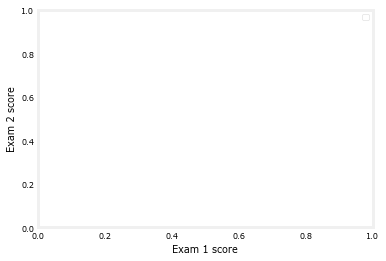

In [22]:
# Plot examples
plot_data(X_train, y_train[:], ax, pos_label="Admitted", neg_label="Not admitted")

# Set the y-axis label
plt.ylabel('Exam 2 score')
# Set the x-axis label
plt.xlabel('Exam 1 score')
plt.legend(loc="upper right")
plt.show()

Your goal is to build a logistic regression model to fit this data.
- With this model, you can then predict if a new student will be admitted based on their scores on the two exams.

#### Sigmoid function

Recall that for logistic regression, the model is represented as

$$ f_{\mathbf{w},b}(x) = g(\mathbf{w}\cdot \mathbf{x} + b)$$
where function $g$ is the sigmoid function. The sigmoid function is defined as:

$$g(z) = \frac{1}{1+e^{-z}}$$

Let's implement the sigmoid function first, so it can be used by the rest of this assignment.

<a name='ex-01'></a>
### Exercise 1
Please complete  the `sigmoid` function to calculate

$$g(z) = \frac{1}{1+e^{-z}}$$

Note that
- `z` is not always a single number, but can also be an array of numbers.
- If the input is an array of numbers, we'd like to apply the sigmoid function to each value in the input array.

In [23]:
# UNQ_C1
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z

    """

    ### START CODE HERE ###
    g = 1 / (1 + math.e ** - z)

    ### END SOLUTION ###

    return g

When you are finished, try testing a few values by calling `sigmoid(x)` in the cell below.
- For large positive values of x, the sigmoid should be close to 1, while for large negative values, the sigmoid should be close to 0.
- Evaluating `sigmoid(0)` should give you exactly 0.5.

In [24]:
print("sigmoid(0) = " + str(sigmoid(0)))
print("sigmoid([ -1, 0, 1, 2]) = " + str(sigmoid(np.array([-1, 0, 1, 2]))))

# UNIT TESTS
from public_tests_week3 import *

sigmoid_test(sigmoid)

sigmoid(0) = 0.5
sigmoid([ -1, 0, 1, 2]) = [0.269 0.5   0.731 0.881]
All tests passed!


### Cost function for logistic regression

In this section, you will implement the cost function for logistic regression.

<a name='ex-02'></a>
### Exercise 2

Please complete the `compute_cost` function using the equations below.

Recall that for logistic regression, the cost function is of the form

$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

where
* m is the number of training examples in the dataset


* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is -

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$


*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$, which is the actual label

*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x^{(i)}} + b)$ where function $g$ is the sigmoid function.
    * It might be helpful to first calculate an intermediate variable $z_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x^{(i)}} + b = w_0x^{(i)}_0 + ... + w_{n-1}x^{(i)}_{n-1} + b$ where $n$ is the number of features, before calculating $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(z_{\mathbf{w},b}(\mathbf{x}^{(i)}))$

Note:
* As you are doing this, remember that the variables `X_train` and `y_train` are not scalar values but matrices of shape ($m, n$) and ($𝑚$,1) respectively, where  $𝑛$ is the number of features and $𝑚$ is the number of training examples.
* You can use the sigmoid function that you implemented above for this part.

If you get stuck, you can check out the hints presented after the cell below to help you with the implementation.

In [25]:
# UNQ_C2
# GRADED FUNCTION: compute_cost
def compute_cost(X, y, w, b, lambda_=1):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (array_like Shape (m,)) target value
      w : (array_like Shape (n,)) Values of parameters of the model
      b : scalar Values of bias parameter of the model
      lambda_: unused placeholder
    Returns:
      total_cost: (scalar)         cost
    """

    m, n = X.shape

    ### START CODE HERE ###
    loss_sum = 0

    # Loop over each training example
    for i in range(m):
        # First calculate z_wb = w[0]*X[i][0]+...+w[n-1]*X[i][n-1]+b
        z_wb = 0
        # Loop over each feature
        for j in range(n):
            # Add the corresponding term to z_wb
            z_wb_ij = w[j] * X[i][j]
            z_wb += z_wb_ij  # equivalent to z_wb = z_wb + z_wb_ij
        # Add the bias term to z_wb
        z_wb += b  # equivalent to z_wb = z_wb + b

        f_wb = sigmoid(z_wb)
        loss = -y[i] * np.log(f_wb) - (1 - y[i]) * np.log(1 - f_wb)

        loss_sum += loss  # equivalent to loss_sum = loss_sum + loss

    total_cost = (1 / m) * loss_sum
    ### END CODE HERE ###

    return total_cost

In [26]:
m, n = X_train.shape

# Compute and display cost with w initialized to zeroes
initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost(X_train, y_train, initial_w, initial_b)
print('Cost at initial w (zeros): {:.3f}'.format(cost))

# Compute and display cost with non-zero w
test_w = np.array([0.2, 0.2])
test_b = -24.
cost = compute_cost(X_train, y_train, test_w, test_b)

print('Cost at test w,b: {:.3f}'.format(cost))


# UNIT TESTS
compute_cost_test(compute_cost)

Cost at initial w (zeros): 0.693
Cost at test w,b: 0.218
All tests passed!


**Expected Output**:
<table>
  <tr>
    <td> <b>Cost at initial w (zeros)<b></td>
    <td> 0.693 </td>
  </tr>
  <tr>
    <td> <b>Cost at test w,b<b></td>
    <td> 0.218 </td>
  </tr>
</table>


### Gradient for logistic regression

In this section, you will implement the gradient for logistic regression.

Recall that the gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & b := b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \newline       \; & w_j := w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1}\newline & \rbrace\end{align*}$$

where, parameters $b$, $w_j$ are all updated simultaniously

Exercise 3

Please complete the `compute_gradient` function to compute $\frac{\partial J(\mathbf{w},b)}{\partial w}$, $\frac{\partial J(\mathbf{w},b)}{\partial b}$ from equations (2) and (3) below.

$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)}) \tag{2}
$$
$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)} \tag{3}
$$
* m is the number of training examples in the dataset


*  $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the actual label


- **Note**: While this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of $f_{\mathbf{w},b}(x)$.

As before, you can use the sigmoid function that you implemented above and if you get stuck, you can check out the hints presented after the cell below to help you with the implementation.

In [27]:
# UNQ_C3
# GRADED FUNCTION: compute_gradient
def compute_gradient(X, y, w, b, lambda_=None):
    """
    Computes the gradient for logistic regression

    Args:
      X : (ndarray Shape (m,n)) variable such as house size
      y : (array_like Shape (m,1)) actual value
      w : (array_like Shape (n,1)) values of parameters of the model
      b : (scalar)                 value of parameter of the model
      lambda_: unused placeholder.
    Returns
      dj_dw: (array_like Shape (n,1)) The gradient of the cost w.r.t. the parameters w.
      dj_db: (scalar)                The gradient of the cost w.r.t. the parameter b.
    """
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    ### START CODE HERE ###
    for i in range(m):
        # Calculate f_wb (exactly as you did in the compute_cost function above)
        z_wb = 0
        # Loop over each feature
        for j in range(n):
            # Add the corresponding term to z_wb
            z_wb_ij = X[i, j] * w[j]
            z_wb += z_wb_ij

        # Add bias term
        z_wb += b

    # Calculate the prediction from the model
        f_wb = sigmoid(z_wb)

        # Calculate the  gradient for b from this example
        dj_db_i = f_wb - y[i]# Your code here to calculate the error

        # add that to dj_db
        dj_db += dj_db_i

        # get dj_dw for each attribute
        for j in range(n):
            # You code here to calculate the gradient from the i-th example for j-th attribute
            dj_dw_ij = (f_wb - y[i])* X[i][j]
            dj_dw[j] += dj_dw_ij

    # divide dj_db and dj_dw by total number of examples
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    ### END CODE HERE ###


    return dj_db, dj_dw

In [28]:
# Compute and display gradient with w initialized to zeroes
initial_w = np.zeros(n)
initial_b = 0.

dj_db, dj_dw = compute_gradient(X_train, y_train, initial_w, initial_b)
print(f'dj_db at initial w (zeros):{dj_db}' )
print(f'dj_dw at initial w (zeros):{dj_dw.tolist()}' )

# Compute and display cost and gradient with non-zero w
test_w = np.array([ 0.2, -0.5])
test_b = -24
dj_db, dj_dw  = compute_gradient(X_train, y_train, test_w, test_b)

print('dj_db at test_w:', dj_db)
print('dj_dw at test_w:', dj_dw.tolist())

# UNIT TESTS
compute_gradient_test(compute_gradient)

dj_db at initial w (zeros):-0.1
dj_dw at initial w (zeros):[-12.00921658929115, -11.262842205513591]
dj_db at test_w: -0.5999999999991071
dj_dw at test_w: [-44.831353617873795, -44.37384124953978]
All tests passed!


### Learning parameters using gradient descent

Similar to the previous assignment, you will now find the optimal parameters of a logistic regression model by using gradient descent.
- You don't need to implement anything for this part. Simply run the cells below.

- A good way to verify that gradient descent is working correctly is to look
at the value of $J(\mathbf{w},b)$ and check that it is decreasing with each step.

- Assuming you have implemented the gradient and computed the cost correctly, your value of $J(\mathbf{w},b)$ should never increase, and should converge to a steady value by the end of the algorithm.

In [29]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking
    num_iters gradient steps with learning rate alpha

    Args:
      X :    (array_like Shape (m, n)
      y :    (array_like Shape (m,))
      w_in : (array_like Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)                 Initial value of parameter of the model
      cost_function:                  function to compute cost
      alpha : (float)                 Learning rate
      num_iters : (int)               number of iterations to run gradient descent
      lambda_ (scalar, float)         regularization constant

    Returns:
      w : (array_like Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """

    # number of training examples
    m = len(X)

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")

    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

In [30]:
np.random.seed(1)
intial_w = 0.01 * (np.random.rand(2).reshape(-1,1) - 0.5)
initial_b = -8


# Some gradient descent settings
iterations = 10000
alpha = 0.001

w,b, J_history,_ = gradient_descent(X_train ,y_train, initial_w, initial_b,
                                    compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost     1.01   
Iteration 1000: Cost     0.31   
Iteration 2000: Cost     0.30   
Iteration 3000: Cost     0.30   
Iteration 4000: Cost     0.30   
Iteration 5000: Cost     0.30   
Iteration 6000: Cost     0.30   
Iteration 7000: Cost     0.30   
Iteration 8000: Cost     0.30   
Iteration 9000: Cost     0.30   
Iteration 9999: Cost     0.30   


### Plotting the decision boundary

We will now use the final parameters from gradient descent to plot the linear fit. If you implemented the previous parts correctly, you should see the following plot:

<img src="../../img/1_supervised_ml_regression_and_classification/supervised/log_reg/plotting_the_decision_boundary.png" width="600"/>

We will use a helper function in the `utils.py` file to create this plot.

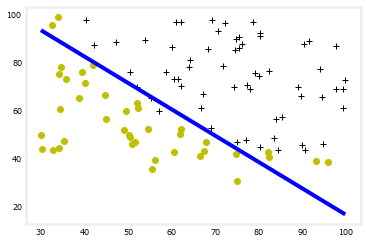

In [32]:
import ml_utils
ml_utils.plot_decision_boundary(w, b, X_train, y_train)

### Evaluating logistic regression

We can evaluate the quality of the parameters we have found by seeing how well the learned model predicts on our training set.

You will implement the `predict` function below to do this.

### Exercise 4

Please complete the `predict` function to produce `1` or `0` predictions given a dataset and a learned parameter vector $w$ and $b$.
- First you need to compute the prediction from the model $f(x^{(i)}) = g(w \cdot x^{(i)} + b)$ for every example
    - You've implemented this before in the parts above
- We interpret the output of the model ($f(x^{(i)})$) as the probability that $y^{(i)}=1$ given $x^{(i)}$ and parameterized by $w$.
- Therefore, to get a final prediction ($y^{(i)}=0$ or $y^{(i)}=1$) from the logistic regression model, you can use the following heuristic -

  if $f(x^{(i)}) >= 0.5$, predict $y^{(i)}=1$

  if $f(x^{(i)}) < 0.5$, predict $y^{(i)}=0$

If you get stuck, you can check out the hints presented after the cell below to help you with the implementation.



In [33]:
# UNQ_C4
# GRADED FUNCTION: predict

def predict(X, w, b):
    """
    Predict whether the label is 0 or 1 using learned logistic
    regression parameters w

    Args:
    X : (ndarray Shape (m, n))
    w : (array_like Shape (n,))      Parameters of the model
    b : (scalar, float)              Parameter of the model

    Returns:
    p: (ndarray (m,1))
        The predictions for X using a threshold at 0.5
    """
    # number of training examples
    m, n = X.shape
    p = np.zeros(m)

    ### START CODE HERE ###
    # Loop over each example
    for i in range(m):
        z_wb = 0
        # Loop over each feature
        for j in range(n):

            # Add the corresponding term to z_wb
            z_wb_ij = X[i, j] * w[j]
            z_wb += z_wb_ij

        # Add bias term
        z_wb += b

        # Calculate the prediction for this example
        f_wb = sigmoid(z_wb)

        # Apply the threshold
        p[i] = f_wb >= 0.5

    ### END CODE HERE ###
    return p

In [34]:
# Test your predict code
np.random.seed(1)
tmp_w = np.random.randn(2)
tmp_b = 0.3
tmp_X = np.random.randn(4, 2) - 0.5

tmp_p = predict(tmp_X, tmp_w, tmp_b)
print(f'Output of predict: shape {tmp_p.shape}, value {tmp_p}')

# UNIT TESTS
predict_test(predict)

Output of predict: shape (4,), value [0. 1. 1. 1.]
All tests passed!


In [35]:
#Compute accuracy on our training set
p = predict(X_train, w,b)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 92.000000


<table>
  <tr>
    <td> <b>Train Accuracy (approx):<b></td>
    <td> 92.00 </td>
  </tr>
</table>

**Expected output**
<table>
  <tr>
    <td> <b>Output of predict: shape (4,),value [0. 1. 1. 1.]<b></td>
  </tr>
</table>

### Interview questions:
1. What is the difference between ‘convex’ and ‘not-convex’ functions
2. why is the squared error cost function doesn’t work well for logistic regression.